In [ ]:
import earthaccess
import xarray as xr
auth = earthaccess.login(persist=True)

In [ ]:
results = earthaccess.search_data(
    short_name = 'PACE_SPEXONE_L1C_SCI',
    temporal = ("2025-03-05", "2025-03-05"),
    bounding_box = (-90.0, 40.0, -75.0, 47.0)
)
len(results)

In [ ]:
results

In [ ]:
fileset = earthaccess.open(results)

In [8]:
datatree = xr.open_datatree(fileset[0], decode_timedelta=False) 
datatree.groups

('/',
 '/sensor_views_bands',
 '/bin_attributes',
 '/geolocation_data',
 '/observation_data')

In [21]:
ds = xr.merge(datatree.to_dict().values())
ds = ds.set_coords(("longitude", "latitude","intensity_wavelength","polarization_wavelength"))
ds

<xarray.Dataset> Size: 449MB
Dimensions:                  (number_of_views: 5,
                              intensity_bands_per_view: 400,
                              polarization_bands_per_view: 50,
                              bins_along_track: 395, bins_across_track: 29)
Coordinates:
    intensity_wavelength     (number_of_views, intensity_bands_per_view) float32 8kB ...
    polarization_wavelength  (number_of_views, polarization_bands_per_view) float32 1kB ...
    latitude                 (bins_along_track, bins_across_track) float32 46kB ...
    longitude                (bins_along_track, bins_across_track) float32 46kB ...
Dimensions without coordinates: number_of_views, intensity_bands_per_view,
                                polarization_bands_per_view, bins_along_track,
                                bins_across_track
Data variables: (12/34)
    sensor_view_angle        (number_of_views) float32 20B ...
    intensity_bandpass       (number_of_views, intensity_bands_per_view) float32 8kB ...
    polarization_bandpass    (number_of_views, polarization_bands_per_view) float32 1kB ...
    intensity_f0             (number_of_views, intensity_bands_per_view) float32 8kB ...
    polarization_f0          (number_of_views, polarization_bands_per_view) float32 1kB ...
    nadir_view_time          (bins_along_track) datetime64[ns] 3kB ...
    ...                       ...
    u_over_i                 (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 11MB ...
    u_over_i_stdev           (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 11MB ...
    dolp                     (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 11MB ...
    dolp_stdev               (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 11MB ...
    aolp                     (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 11MB ...
    aolp_stdev               (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 11MB ...
Attributes: (12/40)
    Conventions:                       CF-1.10 ACDD-1.3
    institution:                       NASA Goddard Space Flight Center, Ocea...
    instrument:                        SPEXone
    software_version:                  3.12
    product_name:                      PACE_SPEXONE.20250305T174755.L1C.V3.5k...
    project:                           PACE Project
    ...                                ...
    geospatial_lon_min:                -84.52154
    geospatial_lon_max:                -76.64497
    history:                           /home/sdpsoper/Science/OCSSW/PACE_V3.0...
    processing_version:                3
    identifier_product_doi_authority:  https://dx.doi.org
    identifier_product_doi:            10.5067/PACE/SPEXONE/L1C/SCI/3

In [12]:
# Plot
dat = ds['i'].isel(
    number_of_views=2,
    intensity_bands_per_view=100)
dat

<xarray.DataArray 'i' (bins_along_track: 395, bins_across_track: 29)> Size: 46kB
[11455 values with dtype=float32]
Coordinates:
    latitude   (bins_along_track, bins_across_track) float32 46kB ...
    longitude  (bins_along_track, bins_across_track) float32 46kB ...
Dimensions without coordinates: bins_along_track, bins_across_track
Attributes:
    long_name:  I Stokes vector component
    units:      W m^-2 sr^-1 um^-1
    valid_max:  999.0
    valid_min:  0.0

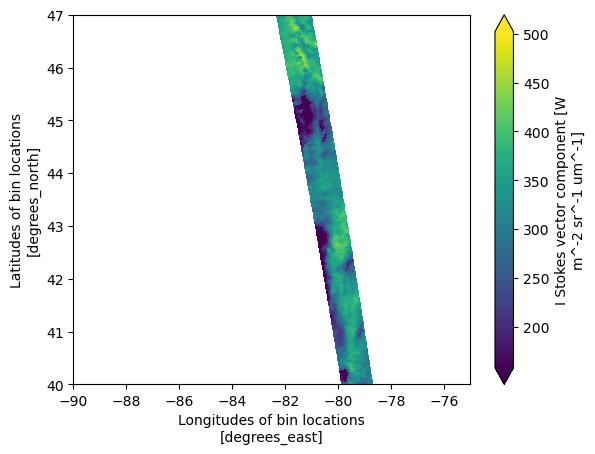

In [13]:
dat.plot(robust=True, 
         x="longitude", y="latitude",
         xlim=(-90, -75), ylim=(40, 47));

## Stokes component vector

I, Q, U and V

* I is radiance, intensity. Q and U are components of I
* Q is linear vertical polarization
* U is linear horizontal polarization
* Degree of linear polarization is

$$DOLP = \sqrt{Q^2 + U^2}/I$$

### I component

In [24]:
# Plot
I = ds['i'].isel(
    number_of_views=2,
    bins_along_track=100, bins_across_track=10)
I

<xarray.DataArray 'i' (intensity_bands_per_view: 400)> Size: 2kB
[400 values with dtype=float32]
Coordinates:
    intensity_wavelength  (intensity_bands_per_view) float32 2kB ...
    latitude              float32 4B ...
    longitude             float32 4B ...
Dimensions without coordinates: intensity_bands_per_view
Attributes:
    long_name:  I Stokes vector component
    units:      W m^-2 sr^-1 um^-1
    valid_max:  999.0
    valid_min:  0.0

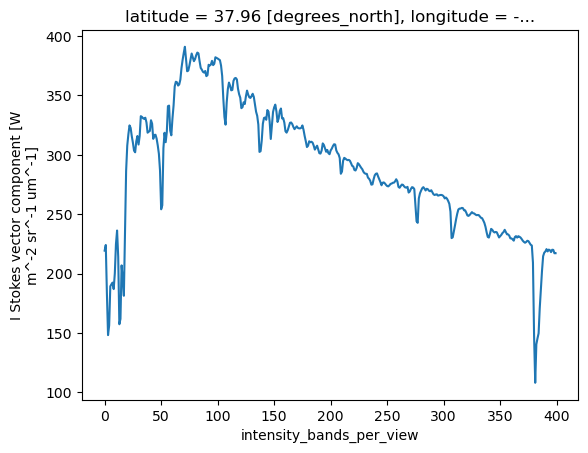

In [25]:
I.plot(x="intensity_bands_per_view")

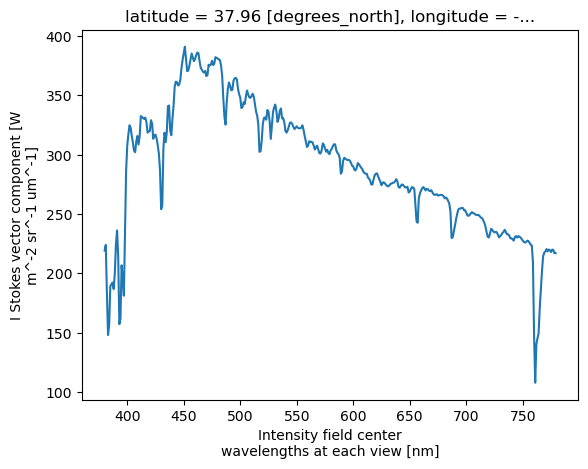

In [26]:
I.plot(x="intensity_wavelength")

### Q Stokes vector component

In [27]:
# Plot
Q = ds['q'].isel(
    number_of_views=2,
    bins_along_track=100, bins_across_track=10)
Q

<xarray.DataArray 'q' (polarization_bands_per_view: 50)> Size: 200B
[50 values with dtype=float32]
Coordinates:
    polarization_wavelength  (polarization_bands_per_view) float32 200B ...
    latitude                 float32 4B ...
    longitude                float32 4B ...
Dimensions without coordinates: polarization_bands_per_view
Attributes:
    long_name:  Q Stokes vector component
    valid_min:  -999.0
    valid_max:  999.0
    units:      W m^-2 sr^-1 um^-1

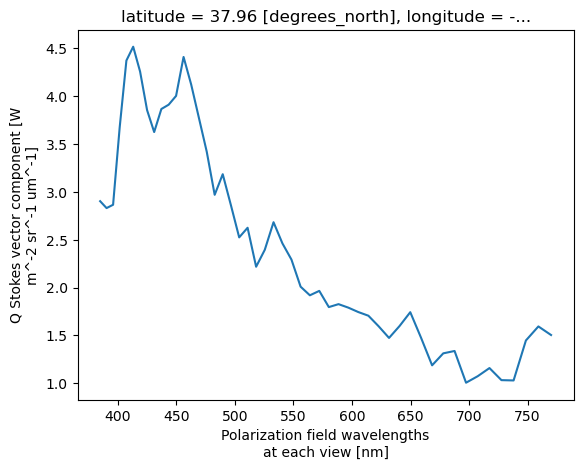

In [28]:
Q.plot(x="polarization_wavelength")

### DOLP

In [30]:
# Plot
dolp = ds['dolp'].isel(
    number_of_views=2,
    polarization_bands_per_view=5)
dolp


<xarray.DataArray 'dolp' (bins_along_track: 395, bins_across_track: 29)> Size: 46kB
[11455 values with dtype=float32]
Coordinates:
    polarization_wavelength  float32 4B ...
    latitude                 (bins_along_track, bins_across_track) float32 46kB ...
    longitude                (bins_along_track, bins_across_track) float32 46kB ...
Dimensions without coordinates: bins_along_track, bins_across_track
Attributes:
    long_name:  Degree of linear polarization
    units:      1
    valid_max:  1.0
    valid_min:  0.0

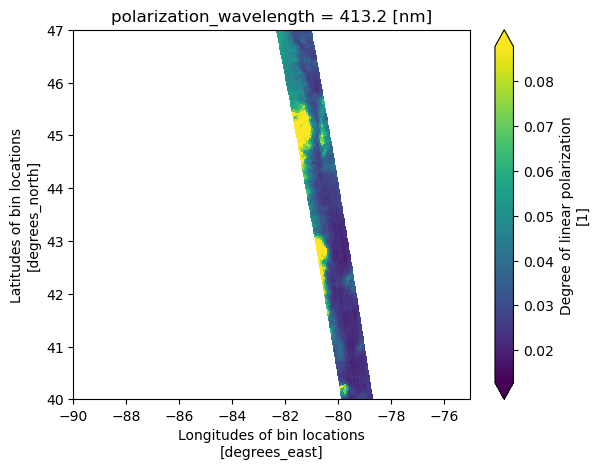

In [31]:
dolp.plot(robust=True, 
         x="longitude", y="latitude",
         xlim=(-90, -75), ylim=(40, 47));

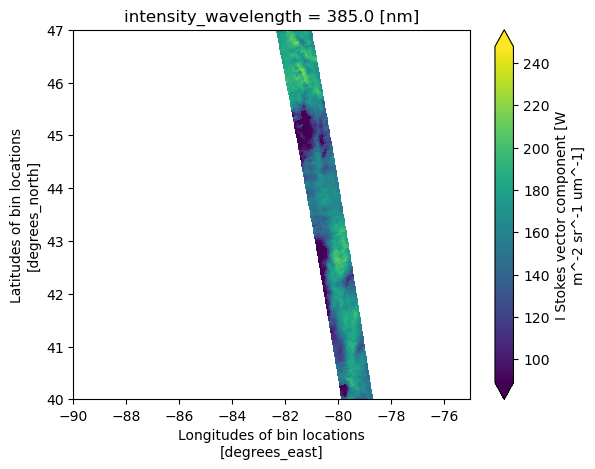

In [32]:
ds['i'].isel(
    number_of_views=2,
    intensity_bands_per_view=5).plot(robust=True, 
         x="longitude", y="latitude",
         xlim=(-90, -75), ylim=(40, 47));